In [1]:
#Wojciech Wróblewski
#zad2 lista1


array = [Float16, Float32, Float64]

function get_eps(type)
     type(3.0) * (type(4.0) / type(3.0) - type(1.0)) - type(1.0)
end


for e in array
    println(e)
    println("eps method ",eps(e))
    println("kahan method ",get_eps(e))
    println("")
end
                        
g=Float64(128)
e = Float64(2^(-46))
println(g)                        
println(e)
println(Float64(g+e))                        



Float16
eps method 0.000977
kahan method -0.000977

Float32
eps method 1.1920929e-7
kahan method 1.1920929e-7

Float64
eps method 2.220446049250313e-16
kahan method -2.220446049250313e-16

128.0
1.4210854715202004e-14
128.0


In [2]:
#Wojciech Wróblewski
#zad1 lista1

types = [Float16, Float32, Float64]


function get_machine_epsilon(_type)
        
    eps = _type(1.0)
    while _type(1.0) + eps / 2 > _type(1.0)
        eps /= 2
    end
    
    return eps
end

                
function get_eta(_type)
                        
    eta = _type(1.0)
    while eta / _type(2.0) > _type(0.0) 
        eta /= _type(2.0)
    end
                            
    return eta
end


function get_max(_type)
                                
    max = prevfloat(_type(1.0))
    while !isinf(max * 2)
        max *= 2
    end
                                    
    return max
end


    
for e in types
    println("========================================")                                     
    println(e)
    println("========================================")                               
    println("MAX ",floatmax(e))
    println("MAX computed ",get_max(e))
    println("")
    println("MACHINE EPSILON ",eps(e))
    println("MACHINE EPSILON computed ",get_machine_epsilon(e))
    println("")
    println("ETA ",nextfloat(e(0.0)))
    println("ETA computed ",get_eta(e))
    println("")                                                  
                                                                                                       
end  
t = Float32
println("=====================================")
println("relacje")
println("=====================================")
println("macheps ",eps(t), " precyzja arytmetyki ", t(0.5) * (t(2.0) ^ (t(1) - t(23))))
                                                
                                                

Float16
MAX 6.55e4
MAX computed 6.55e4

MACHINE EPSILON 0.000977
MACHINE EPSILON computed 0.000977

ETA 6.0e-8
ETA computed 6.0e-8

Float32
MAX 3.4028235e38
MAX computed 3.4028235e38

MACHINE EPSILON 1.1920929e-7
MACHINE EPSILON computed 1.1920929e-7

ETA 1.0e-45
ETA computed 1.0e-45

Float64
MAX 1.7976931348623157e308
MAX computed 1.7976931348623157e308

MACHINE EPSILON 2.220446049250313e-16
MACHINE EPSILON computed 2.220446049250313e-16

ETA 5.0e-324
ETA computed 5.0e-324

relacje
macheps 1.1920929e-7 precyzja arytmetyki 1.1920929e-7


In [3]:
#Wojciech Wróblewski
#zad3 lista1

# touple przechowujące zadane przedziały
bounds = [(Float64(0.5),Float64(1.0))
          (Float64(1.0),Float64(2.0))
          (Float64(2.0),Float64(4.0))]


#zwraca deltę na podstawie wartości dolnej granicy przedziału

function get_delta(a)
    return nextfloat(a) - a
end 

# zwraca t kolejnych bitstringów zaczynając od dolnej granicy przedziału a

function show_bitstrings_lowerbound(a,b, t)
    delta = get_delta(a)
    for k in 1:t
        x = Float64(a) + k * delta
        println(bitstring(x))
    end
end

# zwraca t kolejnych bitstringów zaczynając od górnej granicy przedziału b

function show_bitstrings_upperbound(a, b, t)
    delta = get_delta(a)
    for k in 1:t
        x = Float64(b) - k * delta
        println(bitstring(x))
    end
end


# liczba kolejnych (przesuniętych o delta od poprzednika)
# bitstringów do zaprezentowania dla danego przedziału
s = 3

for a in bounds
    println("") 
    println("Przedział ", a)
    println("=================================================")
    show_bitstrings_lowerbound(a[1],a[2],s)
    for i=1:3
        println(".")
    end
     show_bitstrings_upperbound(a[1],a[2],s)
    
 
end

println("")
println("Wartości delt ale zadanych różnych 3 przedziałów.")
println("=================================================")
for a in bounds
    println("delta dla przedziału [",a,"] to ", get_delta(a[1]))
    
end






Przedział (0.5, 1.0)
0011111111100000000000000000000000000000000000000000000000000001
0011111111100000000000000000000000000000000000000000000000000010
0011111111100000000000000000000000000000000000000000000000000011
.
.
.
0011111111101111111111111111111111111111111111111111111111111111
0011111111101111111111111111111111111111111111111111111111111110
0011111111101111111111111111111111111111111111111111111111111101

Przedział (1.0, 2.0)
0011111111110000000000000000000000000000000000000000000000000001
0011111111110000000000000000000000000000000000000000000000000010
0011111111110000000000000000000000000000000000000000000000000011
.
.
.
0011111111111111111111111111111111111111111111111111111111111111
0011111111111111111111111111111111111111111111111111111111111110
0011111111111111111111111111111111111111111111111111111111111101

Przedział (2.0, 4.0)
0100000000000000000000000000000000000000000000000000000000000001
0100000000000000000000000000000000000000000000000000000000000010
010000000000

In [4]:
#Wojciech Wróblewski
#zad4 lista1

function get_number()
 
    a = Float64(1.0)
    while nextfloat(a) * (Float64(1.0) / nextfloat(a)) == Float64(1.0)
        a = nextfloat(a)
    end
    
    return a
end


function get_smallest_number()
 
    a = nextfloat(-Inf)
    while nextfloat(a) * (Float64(1.0) / nextfloat(a)) == Float64(1.0)
        a = nextfloat(a)
    end
    
    return a 
end



function value(x)
    return  x * (Float64(1.0) / x)
end



println("najmniejsza w przedziale z zadania : ",get_number())
println("najmniejsza globalnie : ",get_smallest_number())


najmniejsza w przedziale z zadania : 1.0000000572289969
najmniejsza globalnie : -1.7976931348623157e308


In [5]:
#Wojciech Wróblewski
#zad5  lista1

# wektory

x=  [2.718281828,-3.141592654,1.414213562,0.577215664,0.301029995]
y=  [1486.2497,878366.9879,-22.37492,4773714.647,0.000185049]

#liczy iloczyn skalarny z podpunktu a

function dot_product_forward(x,y,_type)
   
  result =_type(0)
    
  for i in 1:length(x)
    result += _type(x[i]) * _type(y[i])
  end
    
  return result
end

#liczy iloczyn skalarny z podpunktu c

function dot_product_reverse(x,y,_type)
   
  result =_type(0)
    
  for i in length(x):-1:1
    result += _type(x[i]) * _type(y[i])
  end
    
  return result
end
            
#liczy iloczyn skalarny z podpunktu c

function dot_product_c(x,y,_type)
    pos = zeros(_type, 0)
    neg = zeros(_type, 0)
    
    for i in 1:length(x)
        temp = _type(x[i]) * _type(y[i])
        if temp > 0
            push!(pos,temp) 
        else 
            push!(neg,temp)
        end
    end
        
    pos = sort(pos, rev = true)
    neg = sort(neg)
    
    return sum(pos) + sum(neg)
       
end

#liczy iloczyn skalarny z podpunktu d

function dot_product_d(x,y,_type)
    pos = zeros(_type, 0)
    neg = zeros(_type, 0)
    
    for i in 1:length(x)
        temp = _type(x[i]) * _type(y[i])
        if temp > 0
            push!(pos,temp) 
        else 
            push!(neg,temp)
        end
    end
        
    pos = sort(pos)
    neg = sort(neg, rev = true)
    
    return sum(pos) + sum(neg)
       
end
    
    

println("====================================")
println("type Float64")
println("====================================")
println("a  ",dot_product_forward(x,y,Float64))
println("b  ",dot_product_reverse(x,y,Float64))
println("c  ",dot_product_c(x,y,Float64))
println("d  ",dot_product_d(x,y,Float64))
println("====================================")
println("type Float32")
println("====================================")
println("a  ",dot_product_forward(x,y,Float32))
println("b  ",dot_product_reverse(x,y,Float32))
println("c  ",dot_product_c(x,y,Float32))
println("d  ",dot_product_d(x,y,Float32))
println("====================================")
println("accurate value")
println("====================================")
println("−1.00657107000000·10−11")

type Float64
a  -0.004296342739891585
b  -0.004296342998713953
c  -0.004296342842280865
d  -0.004296342842280865
type Float32
a  -0.4999443
b  -0.4543457
c  -0.5
d  -0.5
accurate value
−1.00657107000000·10−11


In [6]:
#Wojciech Wróblewski
#zad6 lista1

# zwraca argument x który jest potęgą 8
function get_x(x,_type)
    return _type(1.0/8^x)
end

#oblicza funkcję f dla zadanego argumentu i
function func_f(x,_type)
    return sqrt(x^2+_type(1.0))-_type(1.0)
end

#oblicza funkcję g dla zadanego argumentu i typu
function func_g(x,_type)
    return x^2/(sqrt(x^2+_type(1.0))+_type(1.0))
end


# porównnanie funkcji 
for i = 1:15
    println("8 ^ -",i," ; ",func_f(get_x(i,Float64),Float64)," ; ",func_g(get_x(i,Float64),Float64))

end

8 ^ -1 ; 0.0077822185373186414 ; 0.0077822185373187065
8 ^ -2 ; 0.00012206286282867573 ; 0.00012206286282875901
8 ^ -3 ; 1.9073468138230965e-6 ; 1.907346813826566e-6
8 ^ -4 ; 2.9802321943606103e-8 ; 2.9802321943606116e-8
8 ^ -5 ; 4.656612873077393e-10 ; 4.6566128719931904e-10
8 ^ -6 ; 7.275957614183426e-12 ; 7.275957614156956e-12
8 ^ -7 ; 1.1368683772161603e-13 ; 1.1368683772160957e-13
8 ^ -8 ; 1.7763568394002505e-15 ; 1.7763568394002489e-15
8 ^ -9 ; 0.0 ; 2.7755575615628914e-17
8 ^ -10 ; 0.0 ; 4.336808689942018e-19
8 ^ -11 ; 0.0 ; 6.776263578034403e-21
8 ^ -12 ; 0.0 ; 1.0587911840678754e-22
8 ^ -13 ; 0.0 ; 1.6543612251060553e-24
8 ^ -14 ; 0.0 ; 2.5849394142282115e-26
8 ^ -15 ; 0.0 ; 4.0389678347315804e-28


In [11]:
#Wojciech Wróblewski
#zad7 lista1

#zwraca wartość funkcji f dla argumentu x 
function func_f(x)
    return Float64(sin(x) + cos(3x))
end

# zwraca wartość funkcji h zależnej od n
function func_h(n)
    return Float64(1/2^n)
end

# zwraca przybliżoną wartość pochodnej
function derivitive_aprox(x_0,h)
    return Float64(Float64(func_f(x_0 + h)-func_f(x_0))/Float64(h))
end

#zwraca dokładną wartość pochodnej
function derivitive(x_0)
    return Float64(cos(x_0) - Float64(3.0)*sin(Float64(3.0)*x_0))
end

#zwraca błąd
function error(x_0,h,derivitive_x0)
    return abs(derivitive_aprox(x_0,h)-derivitive_x0)
end

# dokładna wartość pochodnej w punkcie 1.0
derivitive_x0 = derivitive(1.0)
println("exact derivitive ",derivitive_x0)

x_0 = Float64(1.0)


for n = 1:54
   
    println(n," ; "," 2^",-n ," ; ",derivitive_aprox(x_0,func_h(n))," ; ",func_h(n)+1.0," ; ",error(x_0,func_h(n),derivitive_x0))
end



    

exact derivitive 0.11694228168853815
1 ;  2^-1 ; 1.8704413979316472 ; 1.5 ; 1.753499116243109
2 ;  2^-2 ; 1.1077870952342974 ; 1.25 ; 0.9908448135457593
3 ;  2^-3 ; 0.6232412792975817 ; 1.125 ; 0.5062989976090435
4 ;  2^-4 ; 0.3704000662035192 ; 1.0625 ; 0.253457784514981
5 ;  2^-5 ; 0.24344307439754687 ; 1.03125 ; 0.1265007927090087
6 ;  2^-6 ; 0.18009756330732785 ; 1.015625 ; 0.0631552816187897
7 ;  2^-7 ; 0.1484913953710958 ; 1.0078125 ; 0.03154911368255764
8 ;  2^-8 ; 0.1327091142805159 ; 1.00390625 ; 0.015766832591977753
9 ;  2^-9 ; 0.1248236929407085 ; 1.001953125 ; 0.007881411252170345
10 ;  2^-10 ; 0.12088247681106168 ; 1.0009765625 ; 0.0039401951225235265
11 ;  2^-11 ; 0.11891225046883847 ; 1.00048828125 ; 0.001969968780300313
12 ;  2^-12 ; 0.11792723373901026 ; 1.000244140625 ; 0.0009849520504721099
13 ;  2^-13 ; 0.11743474961076572 ; 1.0001220703125 ; 0.0004924679222275685
14 ;  2^-14 ; 0.11718851362093119 ; 1.00006103515625 ; 0.0002462319323930373
15 ;  2^-15 ; 0.1170653971

In [8]:
#
# LISTA2
#
#

In [1]:
# Wojciech Wróblewski
# lista2 zad3

using LinearAlgebra

#funkcja hilb() ze strony Profesora Zielińskiego
function hilb(n::Int)
# Function generates the Hilbert matrix  A of size n,
#  A (i, j) = 1 / (i + j - 1)
# Inputs:
#	n: size of matrix A, n>=1
#
#
# Usage: hilb(10)
#
# Pawel Zielinski
        if n < 1
         error("size n should be >= 1")
        end
        return [1 / (i + j - 1) for i in 1:n, j in 1:n]
end


#funkcja matcond() ze strony Profesora Zielińskiego
function matcond(n::Int, c::Float64)
# Function generates a random square matrix A of size n with
# a given condition number c.
# Inputs:
#	n: size of matrix A, n>1
#	c: condition of matrix A, c>= 1.0
#
# Usage: matcond(10, 100.0)
#
# Pawel Zielinski
        if n < 2
         error("size n should be > 1")
        end
        if c< 1.0
         error("condition number  c of a matrix  should be >= 1.0")
        end
        (U,S,V)=svd(rand(n,n))
        return U*diagm(0 =>[LinRange(1.0,c,n);])*V'
end


#błąd względny metody gaussa
function gaussian_err(A,b,n,x)
    return norm(A \ b - x)/norm(x)
end

#bład względny
function inv_err(A,b,n,x)
    return norm(inv(A) * b - x)/norm(x)
end

#funkcja zwraca dane dotyczące macierzy hilberta
function get_hilbert_matrix_data()
        
    for n in 1:1:25
        
        calculate(hilb(n), n)
    end
end

#funkcja zwraca dane dotyczące macierzy losowej
function get_rand_matrix_data()
    
    n_storage = [5,10,20]
    c_storage = [1.0, 10.0, 10.0^3, 10.0^7, 10.0^12, 10.0^16]
    
    for n in n_storage
        for c in c_storage
            calculate(matcond(n,c), n)
        end
    end
end

#dla zadanej macierzy funkcja zwraca wartości jak n,rząd macierzy
# wskaźnik uwarunkowania, błędy względne metod 
function calculate(A, n)
    x = ones(Float64, n)
    b = A * x
    println("n: ",n)
    println("rank(A): ",rank(A))
    println("cond(A): ",cond(A))
    println("g_err: ",gaussian_err(A,b,n,x))
    println(" inv_err: ",inv_err(A,b,n,x))
    println("---------------------------------")
    
end

println("===============================")
println("RANDOM MATRIX")
println("===============================")
get_rand_matrix_data()
println("")
println("")
println("===============================")
println("HILBERT'S MATRIX")
println("===============================")
get_hilbert_matrix_data()

RANDOM MATRIX
n: 5
rank(A): 5
cond(A): 1.0000000000000004
g_err: 1.4043333874306804e-16
 inv_err: 2.432376777795247e-16
---------------------------------
n: 5
rank(A): 5
cond(A): 10.0
g_err: 2.220446049250313e-16
 inv_err: 2.0471501066083611e-16
---------------------------------
n: 5
rank(A): 5
cond(A): 1000.0000000000067
g_err: 7.911147329431554e-15
 inv_err: 8.154812953718269e-15
---------------------------------
n: 5
rank(A): 5
cond(A): 1.000000001269971e7
g_err: 4.245585906858355e-10
 inv_err: 4.5433680155350937e-10
---------------------------------
n: 5
rank(A): 5
cond(A): 9.999166373941462e11
g_err: 1.579545519354896e-6
 inv_err: 6.151014517439689e-6
---------------------------------
n: 5
rank(A): 4
cond(A): 7.981070832239684e15
g_err: 0.08271763362520747
 inv_err: 0.078125
---------------------------------
n: 10
rank(A): 10
cond(A): 1.000000000000001
g_err: 2.0770370905276122e-16
 inv_err: 2.531698018113677e-16
---------------------------------
n: 10
rank(A): 10
cond(A): 10.0000

In [38]:
# Wojciech Wróblewski 
# lista 2 zad4

using Polynomials
import Polynomials

#współrzynniki wielomianu
p1 = [1, -210.0, 20615.0, -1256850.0,
    53327946.0, -1672280820.0, 40171771630.0, -756111184500.0,
    11310276995381.0, -135585182899530.0, 1307535010540395.0,
    -10142299865511450.0, 63030812099294896.0, -311333643161390640.0,
    1206647803780373360.0, -3599979517947607200.0, 8037811822645051776.0,
    -12870931245150988800.0, 13803759753640704000.0, -8752948036761600000.0,
    2432902008176640000.0]
# współczynniki wielomianu po modyfikacji
p2 = [1, -210.0-(1.0/(2.0^23)), 20615.0, -1256850.0,
    53327946.0, -1672280820.0, 40171771630.0, -756111184500.0,
    11310276995381.0, -135585182899530.0, 1307535010540395.0,
    -10142299865511450.0, 63030812099294896.0, -311333643161390640.0,
    1206647803780373360.0, -3599979517947607200.0, 8037811822645051776.0,
    -12870931245150988800.0, 13803759753640704000.0, -8752948036761600000.0,
    2432902008176640000.0]


function calc_polynomial(p)
    normal_poly = Polynomials.Poly(p[end:-1:1])
    roots_poly = Polynomials.poly(1.0:20.0)
    calculated_roots = roots(normal_poly)
    for i in 1:20
      normal_form_value = abs(polyval(normal_poly, calculated_roots[i]))
      roots_form_value = abs(polyval(roots_poly, calculated_roots[i]))
      error = abs(calculated_roots[i] - i)
      print(calculated_roots[i])
      print(" & ")
      print(i)
      print(" & ")
      print(normal_form_value)
      print(" & ")
      print(roots_form_value)
      print(" & ")
      print(error)
      println("\\\\")
    end
end

println("Wilkinson's polynomial")
calc_polynomial(p1)

println("Wilkinson's polynomial with small change")
calc_polynomial(p2)

Wilkinson's polynomial


UndefVarError: UndefVarError: Poly not defined

In [2]:
function p(n::Int, r, p0)
    if n == 0
        return p0
    end
    p_next = p(n-1, r, p0)
    println(p_next + r * p_next * (1 - p_next))
    return p_next + r * p_next * (1 - p_next)
end

function toFixed(n, k)
    return trunc(n*10^k)/10^k
end

function test1()
    
p_trunc = p(10, Float32(3), Float32(0.01))
p_trunc = p(10, Float32(3), Float32(toFixed(p_trunc, 3)))
p_trunc = p(10, Float32(3), Float32(toFixed(p_trunc, 3)))
p_trunc = p(10, Float32(3), Float32(toFixed(p_trunc, 3)))
println("40 iterations, truncated every 10 iterations: ", p_trunc)
end

function test2()
    for type in [Float32, Float64]
        println("40 iterations $type: ", p(40, type(3), type(0.01)))
    end
end

test1()


0.0397
0.15407173
0.5450726
1.2889781
0.1715188
0.5978191
1.3191134
0.056273222
0.21559286
0.7229306
1.3241479
0.036488414
0.14195944
0.50738037
1.2572169
0.28708452
0.9010855
1.1684768
0.577893
1.3096911
0.095556974
0.3548345
1.0416154
0.91157377
1.1533948
0.62262046
1.3275132
0.023178816
0.091103494
0.33951443
1.0112369
0.9771474
1.0441384
0.90587854
1.1616664
0.59825915
1.3192946
0.05556369
0.21299279
0.71587336
40 iterations, truncated every 10 iterations: 0.71587336


┌ Info: Recompiling stale cache file /home/sparrovsky/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


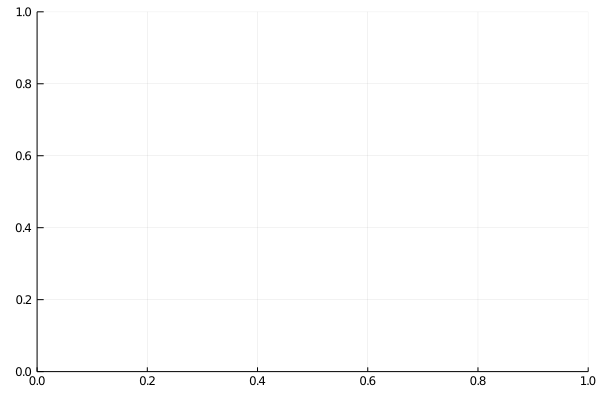

In [1]:
using Plots


plot()

In [1]:
#Wojciech Wroblewski 

using Polynomials
using Polynomials.PolyCompat

coefficients=Float64[1, -210.0, 20615.0,-1256850.0,53327946.0,-1672280820.0,
                         40171771630.0, -756111184500.0,11310276995381.0,
                          -135585182899530.0, 1307535010540395.0,-10142299865511450.0,
                          63030812099294896.0,-311333643161390640.0,1206647803780373360.0,
                        -3599979517947607200.0,8037811822645051776.0,-12870931245150988800.0,
                        13803759753640704000.0,-8752948036761600000.0,2432902008176640000.0                        
]
                        
coefficients2=Float64[1,  -210.0 - (2)^(-23), 20615.0,-1256850.0,53327946.0,-1672280820.0,
                         40171771630.0, -756111184500.0,11310276995381.0,
                          -135585182899530.0, 1307535010540395.0,-10142299865511450.0,
                          63030812099294896.0,-311333643161390640.0,1206647803780373360.0,
                        -3599979517947607200.0,8037811822645051776.0,-12870931245150988800.0,
                        13803759753640704000.0,-8752948036761600000.0,2432902008176640000.0
]

function get_P(coefficients)
    coefficients = reverse(coefficients)
    return  Poly(coefficients)
end
function get_p()
    return poly(Float64[1.0:20.0;])
end

function get_data(coefficients)
    p =get_p()
    P =get_P(coefficients)
    c_roots = roots(P)
    println("k & zk & |P(zk)| & p(zk)| & |zk - k| ")
    for k in 1:20
        z = c_roots[k]
      
        println(
            "$k & $z & $(abs(polyval(P, z))) & $(abs(polyval(p, z))) & $(abs(z - k)) \\\\ \\hline"
        ) 
  end
end

get_data(coefficients)
println("\n")
println("\n")
get_data(coefficients2)


k & zk & |P(zk)| & p(zk)| & |zk - k| 
1 & 19.999809291236637 & 2.7462952745472e13 & 2.7462788907008e13 & 18.999809291236637 \\ \hline
2 & 19.00190981829944 & 1.0278376162816e13 & 1.0278235656704e13 & 17.00190981829944 \\ \hline
3 & 17.99092135271648 & 7.199554861056e12 & 7.1994474752e12 & 14.99092135271648 \\ \hline
4 & 17.025427146237412 & 3.777623778304e12 & 3.777532946944e12 & 13.025427146237412 \\ \hline
5 & 15.946286716607972 & 1.555027751936e12 & 1.554961097216e12 & 10.946286716607972 \\ \hline
6 & 15.075493799699476 & 6.13987753472e11 & 6.13938415616e11 & 9.075493799699476 \\ \hline
7 & 13.914755591802127 & 3.65383250944e11 & 3.653447936e11 & 6.914755591802127 \\ \hline
8 & 13.07431403244734 & 2.15723629056e11 & 2.15696330752e11 & 5.07431403244734 \\ \hline
9 & 11.953283253846857 & 7.216771584e10 & 7.2146650624e10 & 2.953283253846857 \\ \hline
10 & 11.025022932909318 & 3.5759895552e10 & 3.5743469056e10 & 1.0250229329093177 \\ \hline
11 & 9.990413042481725 & 1.2707126784e10 & 1.2